In [26]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import glob
import pickle
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [11]:
# camera calibration

# termination criteria
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)
objp = np.zeros((9*6,3), np.float32)
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2)

imgpoints = []
objpoints = []

images = glob.glob('./camera_cal/calibration*.jpg')
for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (9,6),None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (7,6), corners2,ret)


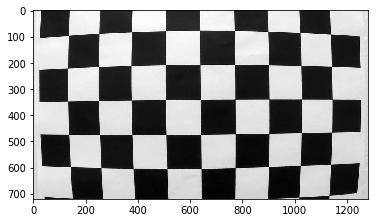

In [12]:
img = cv2.imread('camera_cal/calibration1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#print(img)
plt.imshow(img, cmap='gray')

In [13]:
img_size = (img.shape[1], img.shape[0])
print(img_size)
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
dst = cv2.undistort(img, mtx, dist, None, mtx)

dist_pickle = {}
dist_pickle["mtx"] = mtx
dist_pickle["dist"] = dist
pickle.dump( dist_pickle, open( "calibration.p", "wb" ) )

(1280, 720)


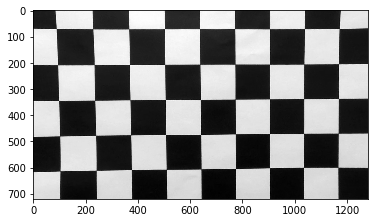

In [15]:
plt.imshow(dst, cmap='gray') # Undistorted Image

## Prespective transformation

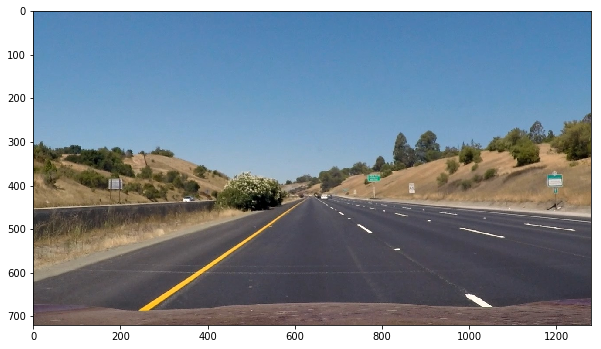

In [71]:
img = cv2.imread('test_images/straight_lines1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### Undistorted test image

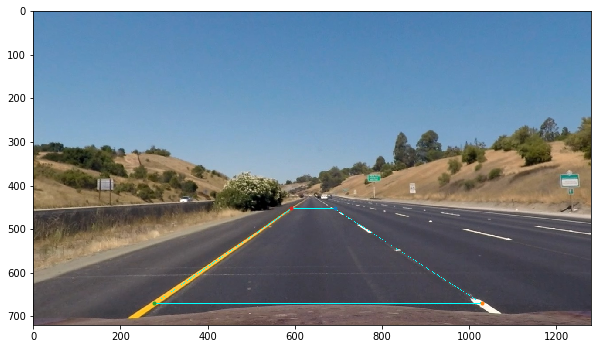

In [81]:
dist_pickle = pickle.load( open( "calibration.p", "rb" ) )
mtx = dist_pickle["mtx"]
dist = dist_pickle["dist"]
dst = cv2.undistort(img, mtx, dist, None, mtx)
pts = np.array([[68, 452],[1029, 670],[278, 670],[593, 452]], np.int32)
pts = pts.reshape((-1,1,2))
cv2.polylines(dst,[pts],True,(0,255,255))
plt.plot(692, 452,'.')
plt.plot(1029, 670,'.')
plt.plot(278, 670,'.')
plt.plot(591, 452,'.')
plt.imshow(dst)

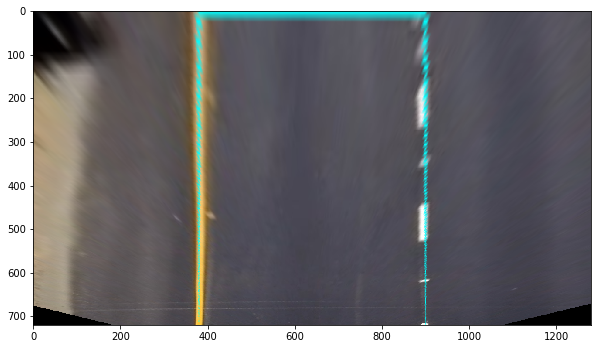

In [83]:
h,w = dst.shape[:2]
src_p = np.float32(
    [
        [688, 452],
        [1029, 670],
        [278, 670],
        [593, 452]
    ]
)

dst_p = np.float32(
    [
        [w-380, 0],
        [w-380, h],
        [380, h],
        [380, 0]
    ]
)

M = cv2.getPerspectiveTransform(src_p, dst_p)
Minv = cv2.getPerspectiveTransform(dst_p, src_p)

warped = cv2.warpPerspective(dst, M, (w,h), flags=cv2.INTER_LINEAR)
plt.imshow(warped)


In [29]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,filename))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if img is not None:
            images.append(img)
    return images

sample_images = np.array(load_images_from_folder('test_images'))
straight_lines_imgs = sample_images[0:2]
test_imgs = sample_images[2:]

(2, 720, 1280, 3)
(6, 720, 1280, 3)


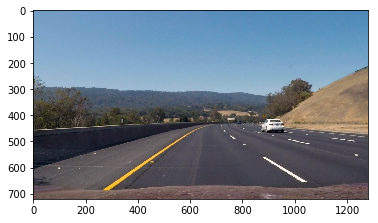

In [30]:
plt.imshow(straight_lines_imgs[0])
print(straight_lines_imgs.shape)
print(test_imgs.shape)

In [17]:
cap = cv2.VideoCapture('project_video.mp4')
frames = []
while(True):
    ret, frame = cap.read()
    if ret == 0:
        break
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    frames.append(frame)
    
cap.release()

In [18]:
frames = np.array(frames)
print(frames.shape)

(1245, 720, 1280, 3)


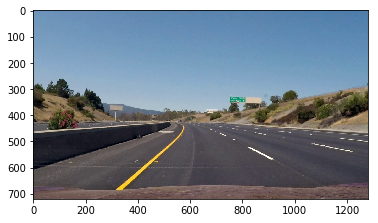

In [19]:
plt.imshow(frames[0])